# _Работа 5:_ Рамножающие свойства решетки реактора корпусного типа
**Вариант 6:**

 - Топливо: $UO_2$, $x=3.6\%$ 
 - Оболочка: $Zr$
 - Замедлитель: $H_2O, \rho = 0.7\  \text{г}/\text{см}^3$
 - Диаметр твэла: $d = 6.0\  \text{мм}$
 - $\delta_T = 0.5 \text{мм}$
 - Граничные условия: полное отражение на границе


### Выполнение 
**Задание**: Произвести ряд расчетов макросечений и $K_\infty$ при различных радиусах ячейки, найти оптимальный шаг решетки. Повторить для $x = 4.4 \%$.
 
Сначала инициализируем интерфейс взаимодействия с гетерой:

In [9]:
import matplotlib.pyplot as pl
import numpy as np
import pandas as pd
import pyGetera

getera = pyGetera.GeteraInterface(
    getera_path='D:\\bin\\',
    input_file='lab5.txt',
    output_file='lab5.out')

## Задание 1
Расчитаем необходимые концентрации:

In [10]:
C = 100
ptop0 = 10.97*6.02*10**(23)/269.928
pzam01 = 0.7*6.02*10**(23)/18.015

Rho1 = pd.DataFrame({'x':[3.6, 4.4, 3.0]})
Rho1['pzam'] = C*pzam01*ptop0/(C*ptop0+pzam01)
Rho1['ptop'] = pzam01*ptop0/(C*ptop0+pzam01)
Rho1['U235'] = (Rho1.x/100)*Rho1.ptop*10**(-24)
Rho1['U238'] = (1-Rho1.x/100)*Rho1.ptop*10**(-24)
Rho1['O'] =2*Rho1.ptop*10**(-24)
Rho1['Zr'] = 0.03891
Rho1['*H*'] = 2*Rho1.pzam*10.97**(-24)
Rho1['*O*'] = Rho1.pzam*10**(-24)

Rcell = 5
d = 6
delta_t = 0.5

Rho1


,x,pzam,ptop,U235,U238,O,Zr,*H*,*O*
0,3.6,2.317009e+22,2.317009e+20,0.000008,0.000223,0.000463,0.03891,0.005023,0.02317
1,4.4,2.317009e+22,2.317009e+20,0.000010,0.000222,0.000463,0.03891,0.005023,0.02317
2,3.0,2.317009e+22,2.317009e+20,0.000007,0.000225,0.000463,0.03891,0.005023,0.02317


In [11]:
getera = pyGetera.GeteraInterface(
    getera_path='D:\\bin\\',
    input_file='lab8VVER.txt',
    output_file='lab8VVER.out')

ptop0 = 10.97*6.02*10**(23)/269.928
pzam01 = 0.7*6.02*10**(23)/18.015
Rho1 = pd.DataFrame({'x':[3.0]})
Rho1['pzam'] = pzam01 
Rho1['ptop'] = ptop0 
Rho1['U235'] = (Rho1.x/100)*Rho1.ptop*10**(-24)
Rho1['U238'] = (1-Rho1.x/100)*Rho1.ptop*10**(-24)
Rho1['O'] =2*Rho1.ptop*10**(-24)
Rho1['Zr'] = 0.03891
Rho1['*H*'] = 2*Rho1.pzam*10.97**(-24)
Rho1['*O*'] = Rho1.pzam*10**(-24)

Rcell = 0.4
d = 0.6
delta_t = 0.05

getera.input({
        'r':    [d/2 - delta_t,   d/2,            Rcell],
        'U235': [Rho1['U235'][0], 0,              0],
        'U238': [Rho1['U238'][0], 0,              0],
        'O':    [Rho1['O'][0],    0,              0],
        'Zr':   [0,               Rho1['Zr'][0],  0],
        '*H*':  [0,               0,              Rho1['*H*'][0]],
        '*O*':  [0,               0,              Rho1['*O*'][0]]
    })
Rho1

,x,pzam,ptop,U235,U238,O,Zr,*H*,*O*
0,3.0,2.339162e+22,2.446556e+22,0.000734,0.023732,0.048931,0.03891,0.005071,0.023392


Произведем расчет коэфициентов для обогащения $3.6\%$ и шага решетки $5\ мм$:

In [3]:
def lab5(Rcell, i):
    getera.input({
        'r':    [d/2 - delta_t,   d/2,            Rcell],
        'U235': [Rho1['U235'][i], 0,              0],
        'U238': [Rho1['U238'][i], 0,              0],
        'O':    [Rho1['O'][i],    0,              0],
        'Zr':   [0,               Rho1['Zr'][0],  0],
        '*H*':  [0,               0,              Rho1['*H*'][i]],
        '*O*':  [0,               0,              Rho1['*O*'][i]]
    })

    result = getera.output(format='pandas', columns=['keff', 'nu', 'mu', 'teta', '3::sabs2', '1::sabs2', '1::nusfis2'])
    return result
lab5(Rcell, 0)

,keff,nu,mu,teta,3::sabs2,1::sabs2,1::nusfis2
0,0.73691,1.8614,1.0248,0.43715,0.000995,0.003513,0.00654


## Задание 2
Найдём оптимальный шаг решетки для обогащения $3.6 \%$:

R optimum for x=3.6/%: 3.949999999999997


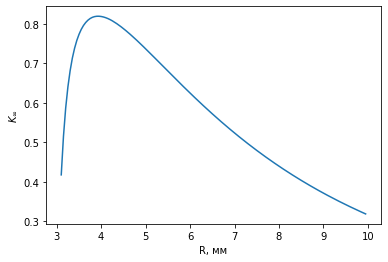

In [6]:
def find_opt(RcellRange, i):
    list_of_res = []
    for r in RcellRange:
        list_of_res.append(lab5(r, i))
    results = pd.concat(list_of_res, axis=0, ignore_index=True)
    return results


RcellRange = np.arange(3.1, 10, 0.05 )
results1 = find_opt(RcellRange, 0)
pl.plot(RcellRange, results1['keff'])
pl.xlabel('R, мм')
pl.ylabel('$K_{\infty}$')
print("R optimum for x=3.6/%:", RcellRange[np.argmax(results1['keff'])])
    

R optimum for x=3/%: 3.8999999999999972


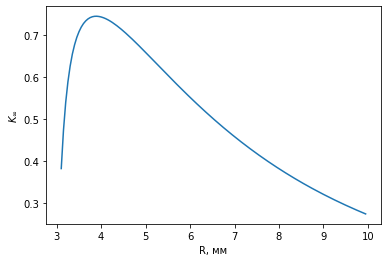

In [8]:
RcellRange = np.arange(3.1, 10, 0.05 )
results1 = find_opt(RcellRange, 2)
pl.plot(RcellRange, results1['keff'])
pl.xlabel('R, мм')
pl.ylabel('$K_{\infty}$')
print("R optimum for x=3/%:", RcellRange[np.argmax(results1['keff'])])

Теперь найдем оптимальный шаг для обогащения $4.4 \%$:

R optimum for x=4.4%: 3.999999999999997


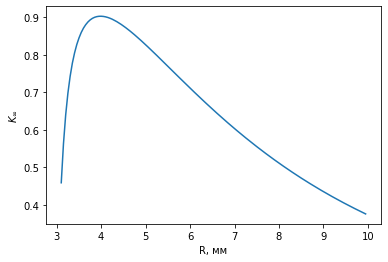

In [8]:
RcellRange = np.arange(3.1, 10, 0.05 )
results2 = find_opt(RcellRange, 1)
pl.plot(RcellRange, results2['keff'])
pl.xlabel('R, мм')
pl.ylabel('$K_{\infty}$')
print("R optimum for x=4.4%:", RcellRange[np.argmax(results2['keff'])])

Теперь построим общий график:

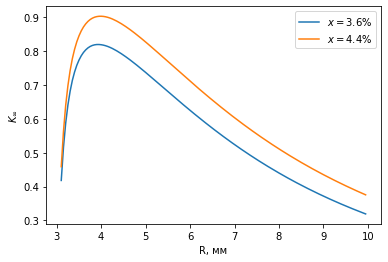

		----====Таблица для x=3.6%====----


,\(K_{\infty}\),$\nu$,$\mu$,$\vartheta$,$\Sigma_{a}^{зам}$,$\Sigma_{a}^{топ}$,$\nu_f\Sigma_f^{зам}$
0,0.41801,1.8280,1.4939,0.61919,0.000625,0.002078,0.003799
10,0.79600,1.8561,1.0719,0.57420,0.000901,0.003151,0.005849
20,0.81581,1.8595,1.0409,0.52236,0.000959,0.003375,0.006275
30,0.77876,1.8609,1.0296,0.47343,0.000984,0.003470,0.006457
40,0.72578,1.8616,1.0239,0.42851,0.000997,0.003522,0.006556
50,0.66927,1.8620,1.0205,0.38784,0.001006,0.003554,0.006618
60,0.61413,1.8623,1.0182,0.35133,0.001011,0.003576,0.006659
70,0.56239,1.8625,1.0167,0.31875,0.001015,0.003592,0.006689
80,0.51483,1.8626,1.0156,0.28975,0.001018,0.003603,0.006711
90,0.47159,1.8627,1.0148,0.26397,0.001020,0.003612,0.006728


		----====Таблица для x=4.4%====----


,\(K_{\infty}\),$\nu$,$\mu$,$\vartheta$,$\Sigma_{a}^{зам}$,$\Sigma_{a}^{топ}$,$\nu_f\Sigma_f^{зам}$
0,0.45867,1.8643,1.5555,0.65825,0.000599,0.002360,0.004400
10,0.87126,1.8927,1.0782,0.61669,0.000885,0.003694,0.006991
20,0.90131,1.8963,1.0436,0.56633,0.000949,0.003990,0.007566
30,0.86802,1.8977,1.0312,0.51782,0.000977,0.004119,0.007816
40,0.81556,1.8984,1.0248,0.47248,0.000992,0.004190,0.007954
50,0.75761,1.8988,1.0210,0.43078,0.001001,0.004234,0.008039
60,0.69981,1.8991,1.0186,0.39282,0.001008,0.004264,0.008098
70,0.64466,1.8993,1.0169,0.35850,0.001012,0.004285,0.008139
80,0.59327,1.8995,1.0156,0.32761,0.001016,0.004301,0.008170
90,0.54601,1.8996,1.0147,0.29988,0.001018,0.004314,0.008194


In [11]:
pl.plot(RcellRange, results1['keff'], label='$x=3.6\%$')
pl.plot(RcellRange, results2['keff'], label='$x=4.4\%$')
pl.xlabel('R, мм')
pl.ylabel('$K_{\infty}$')
pl.legend()
pl.show()
to_tex_dict = {
    'keff': r'\(K_{\infty}\)',
    'nu': r'\(\nu\)',
    'mu': r'$\mu$',
    'teta': r'$\vartheta$',
    '3::sabs2': r'$\Sigma_{a}^{зам}$',
    '1::sabs2': r'$\Sigma_{a}^{топ}$',
    '1::nusfis2': r'$\nu_f\Sigma_f^{зам}$'
}
print('\t\t----====Таблица для x=3.6%====----')
display(results1.rename(columns=to_tex_dict)[::10])
print('\t\t----====Таблица для x=4.4%====----')
display(results2.rename(columns=to_tex_dict)[::10])